In [19]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

df = pd.read_csv('cleaned_data.csv')
df.head()


,Unnamed: 0,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,...,Kinema Citrus,SynergySP,Arms,Project No.9,David Production,TNK,Telecom Animation Film,White Fox,Wit Studio,Duration_mins
0,0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26,...,False,False,False,False,False,False,False,False,False,24
1,2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26,...,False,False,False,False,False,False,False,False,False,24
2,3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26,...,False,False,False,False,False,False,False,False,False,25
3,4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52,...,False,False,False,False,False,False,False,False,False,23
4,5,15,Eyeshield 21,UNKNOWN,アイシールド21,7.92,Sports,"Shy, reserved, and small-statured, Deimon High...",TV,145,...,False,False,False,False,False,False,False,False,False,23


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Columns: 101 entries, Unnamed: 0 to Duration_mins
dtypes: bool(72), float64(1), int64(12), object(16)
memory usage: 1.2+ MB


In [21]:
# set categorical types
category_cols = ['Rating','Type','Status','Source','season','Studio']
int_cols = ['Rank','Episodes','Scored By','Popularity','Favorites','Members','Premier_Month']
float_cols = ['Score']

genres = ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi']
studios = ['Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'Wit Studio']

types = dict([(i,'category') for i in category_cols])
df = df.astype(types)

### Categorical Data

For seasons(changed to 0-3 int):

    0: Winter
    1: Spring
    2: Summer
    3: Autumn

In [5]:
catdf=pd.DataFrame()
for i in category_cols:
    catdf[i]=df[i]
catdf

,Rating,Type,Status,Source,season,Studio
0,R - 17+ (violence & profanity),TV,Finished Airing,Original,1,Sunrise
1,PG-13 - Teens 13 or older,TV,Finished Airing,Manga,1,Madhouse
2,PG-13 - Teens 13 or older,TV,Finished Airing,Original,2,Sunrise
3,PG - Children,TV,Finished Airing,Manga,3,Toei Animation
4,PG-13 - Teens 13 or older,TV,Finished Airing,Manga,1,Gallop
...,...,...,...,...,...,...
4276,PG-13 - Teens 13 or older,TV,Currently Airing,Manga,1,none
4277,PG-13 - Teens 13 or older,TV,Currently Airing,Mixed media,1,Lerche
4278,PG - Children,TV,Finished Airing,Game,0,OLM
4279,PG-13 - Teens 13 or older,TV,Currently Airing,Manga,1,Satelight


In [6]:
for col in catdf:
    print(f'=============== {col} ===============')
    print("Types of Categories :", len(catdf[col].unique()))
    print(catdf[col].value_counts())
    print()
    

=============== Rating ===============
Types of Categories : 6
Rating
PG-13 - Teens 13 or older         2528
G - All Ages                       594
R - 17+ (violence & profanity)     537
PG - Children                      338
R+ - Mild Nudity                   258
UNKNOWN                             26
Name: count, dtype: int64

=============== Type ===============
Types of Categories : 1
Type
TV    4281
Name: count, dtype: int64

=============== Status ===============
Types of Categories : 2
Status
Finished Airing     4242
Currently Airing      39
Name: count, dtype: int64

=============== Source ===============
Types of Categories : 16
Source
Manga           1501
Original         963
Light novel      420
Game             264
Unknown          264
Visual novel     162
4-koma manga     139
Novel            136
Web manga        136
Other            131
Mixed media       56
Card game         45
Book              33
Picture book      15
Music             12
Radio              4
Name: count

In [7]:
catdf.drop(columns=['Type', 'Status'])

,Rating,Source,season,Studio
0,R - 17+ (violence & profanity),Original,1,Sunrise
1,PG-13 - Teens 13 or older,Manga,1,Madhouse
2,PG-13 - Teens 13 or older,Original,2,Sunrise
3,PG - Children,Manga,3,Toei Animation
4,PG-13 - Teens 13 or older,Manga,1,Gallop
...,...,...,...,...
4276,PG-13 - Teens 13 or older,Manga,1,none
4277,PG-13 - Teens 13 or older,Mixed media,1,Lerche
4278,PG - Children,Game,0,OLM
4279,PG-13 - Teens 13 or older,Manga,1,Satelight


'Type' is dropped because it is singly catagorised to TV\
'Status' is dropped too since whether show is currently airing is relatively insignificant in determining 'Score' 

We are left with categorial variables: Rating, Source, season, Studio\
'Produers' has been excluded, since we feel that Producers do not have a large impact on how well an anime does

In [22]:
def plot_categories(x,y):
    """plot the boxplot of x against y, as well as the countplot of y.
    @param x: The variable to be investigated
    @param y: The categorical data"""
    print(f'=============== {y} ===============')
    df2 = df[[y, x]].astype({y:'category'}) # need to set variable as category
    cats = df2[y].cat.categories
    plt.figure(figsize=(8,6))
    sb.countplot(data=df2[y])
    plt.show()
    print(f'categories: {len(cats)}')

    plt.figure(figsize=(8,6))
    sb.boxplot(data=df2, x=x,y=y,orient='h')
    plt.show()

In [23]:
for y in catdf:
    plot_categories('Score',y)

=============== Rating ===============


ValueError: could not convert string to float: 'R - 17+ (violence & profanity)'

<Figure size 800x600 with 0 Axes>

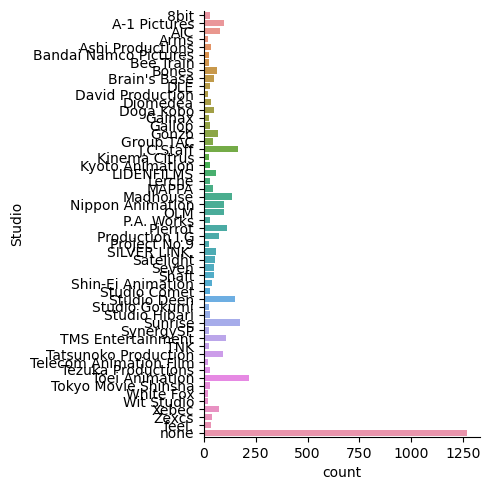

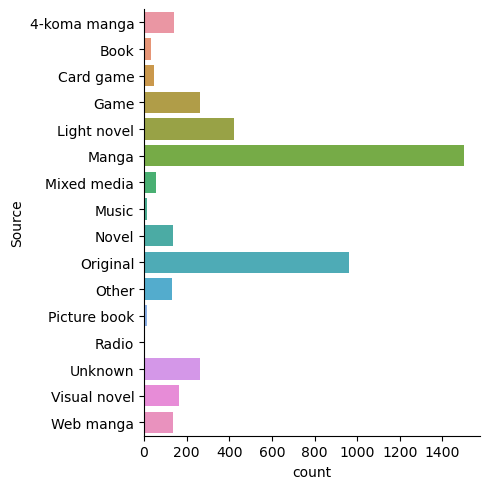

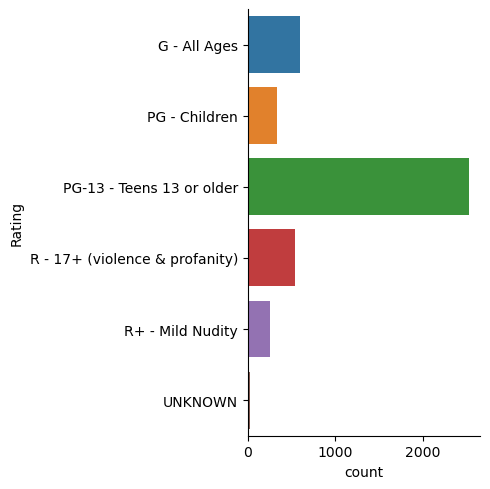

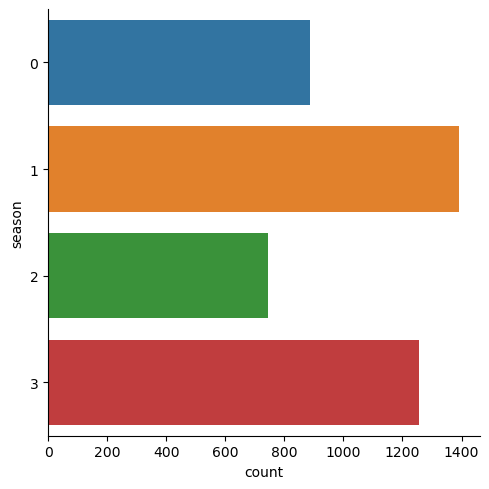

In [18]:
#backup for if the above function did not work
sb.catplot(y = "Studio", data = catdf, kind = "count", height = 5)
sb.catplot(y = "Source", data = catdf, kind = "count", height = 5)
sb.catplot(y = "Rating", data = catdf, kind = "count", height = 5)
sb.catplot(y = "season", data = catdf, kind = "count", height = 5)

### Analysis of Numeric Variables


In [31]:
numdf=pd.DataFrame()
for i in int_cols:
    numdf[i]=df[i]
numdf['Score']=df['Score']
numdf

,Rank,Episodes,Scored By,Popularity,Favorites,Members,Premier_Month,Score
0,41,26,914193,43,78525,1771505,1179,8.75
1,328,26,356739,246,15035,727252,1179,8.22
2,2764,26,42829,1795,613,111931,1230,7.25
3,4240,52,6413,5126,14,15001,1257,6.94
4,688,145,86524,1252,1997,177688,1263,7.92
...,...,...,...,...,...,...,...,...
4276,1812,13,9360,3074,178,44954,1479,7.47
4277,5256,12,1453,6339,39,8943,1479,6.72
4278,1517,11,7808,4673,128,19087,1476,7.56
4279,7922,12,6247,3626,78,32829,1479,6.19


We look at numerical variables: Score, Episodes, Popularity, Favourites, Scored By, Members, Year, Premier_Month Duration_mins, Rank\
We exclude Rank because the animes are ranked based on Score

In [33]:
numdf.describe().round(2)

,Rank,Episodes,Scored By,Popularity,Favorites,Members,Premier_Month,Score
count,4281.00,4281.00,4281.00,4281.00,4281.00,4281.00,4281.00,4281.00
mean,4723.65,29.06,83533.26,4629.42,2148.06,161782.98,1301.47,6.89
std,3165.26,61.53,201975.42,3948.59,9585.19,330540.43,149.37,0.80
min,1.00,2.00,113.00,1.00,1.00,405.00,735.00,2.90
25%,2046.00,12.00,2172.00,1355.00,14.00,6353.00,1239.00,6.38
50%,4336.00,13.00,13524.00,3454.00,111.00,36671.00,1344.00,6.91
75%,6955.00,26.00,69778.00,7263.00,778.00,161732.00,1413.00,7.41
max,12689.00,1787.00,2660903.00,15842.00,217606.00,3744541.00,1479.00,9.10


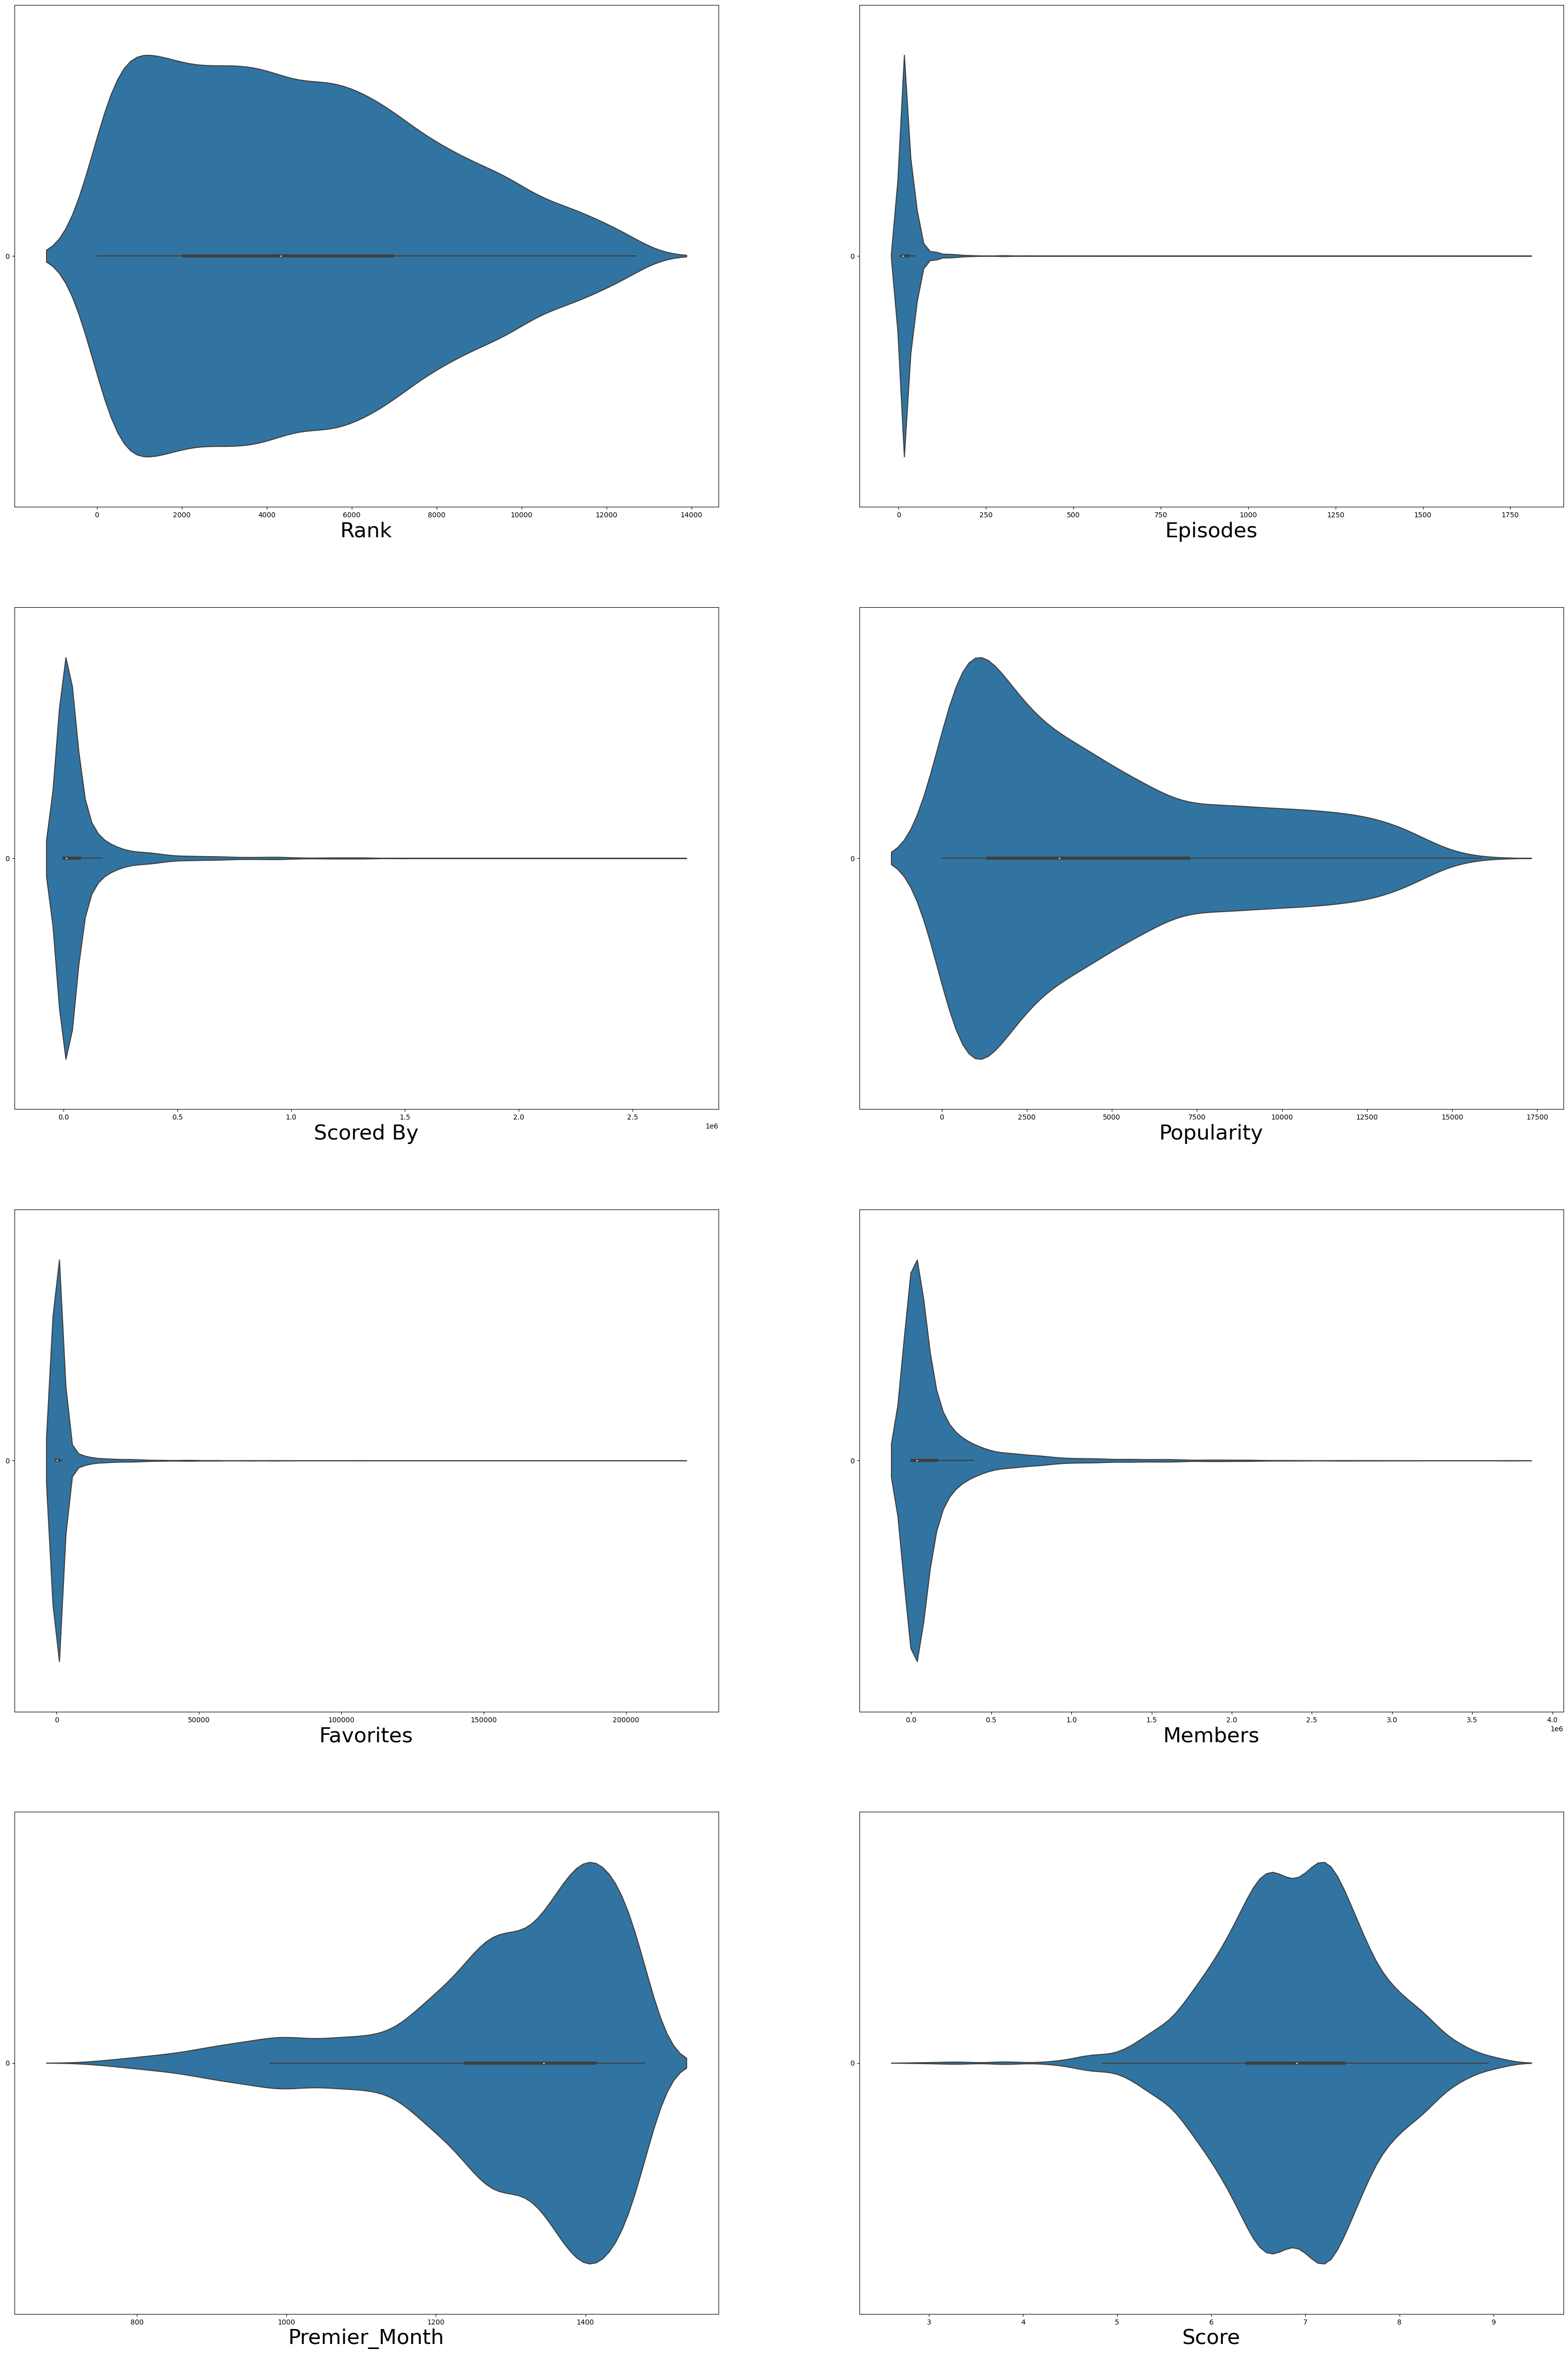

In [36]:
f, axes = plt.subplots(4,2,figsize=(40,60))
count = 0
row = 0
othernumericaldata = [x for x in numdf.columns]
for var in othernumericaldata:
    if count % 2 == 0:
        col = 0
    else:
        col = 1
    sb.violinplot(data = numdf[var], orient = "h", ax = axes[row,col])
    ax = axes[row,col]
    ax.set_xlabel(var,fontsize=30)
    count+=1
    if count %2 == 0:
        row+=1

### Plotting the numerical data

For Premier Month: Months since 1900 that the show premiered in

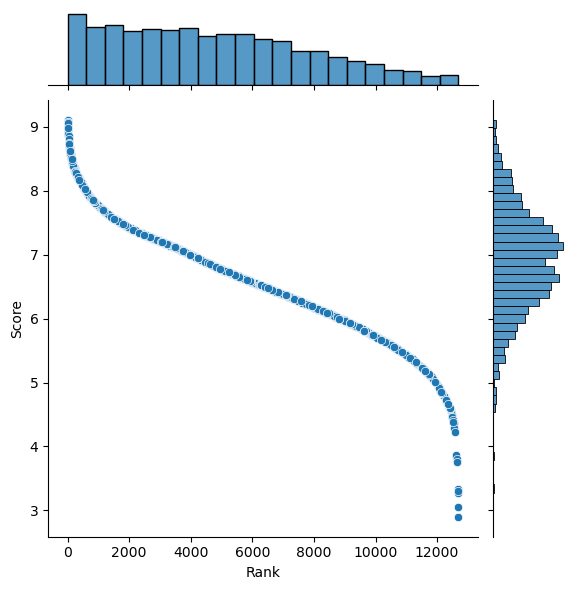

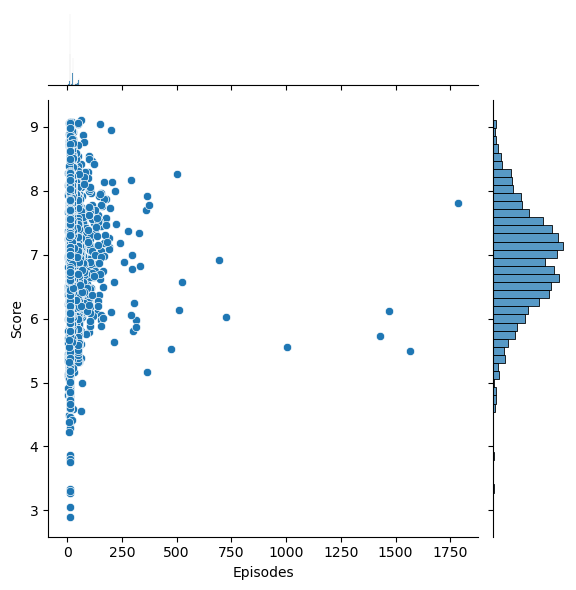

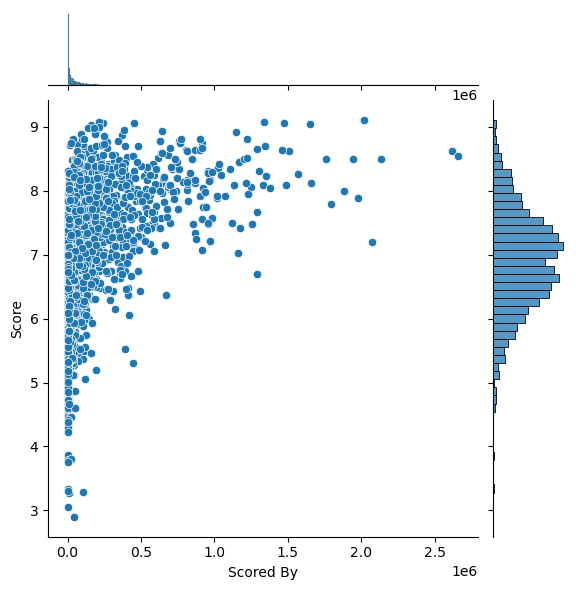

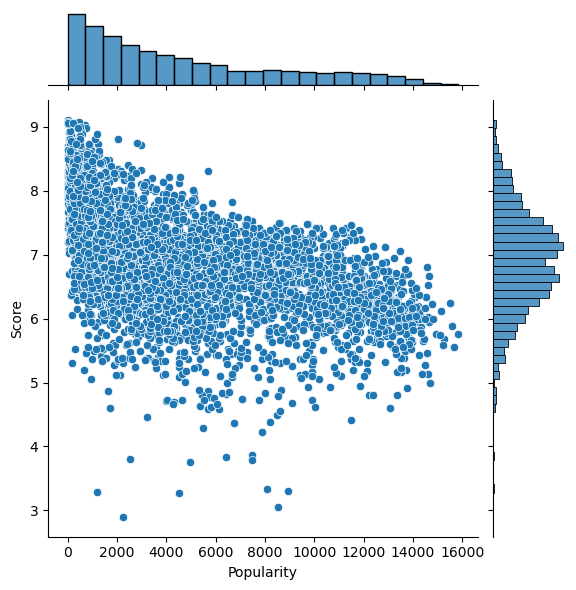

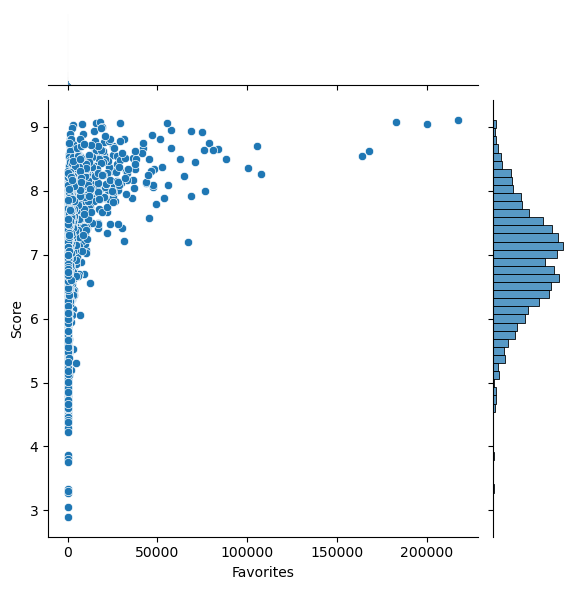

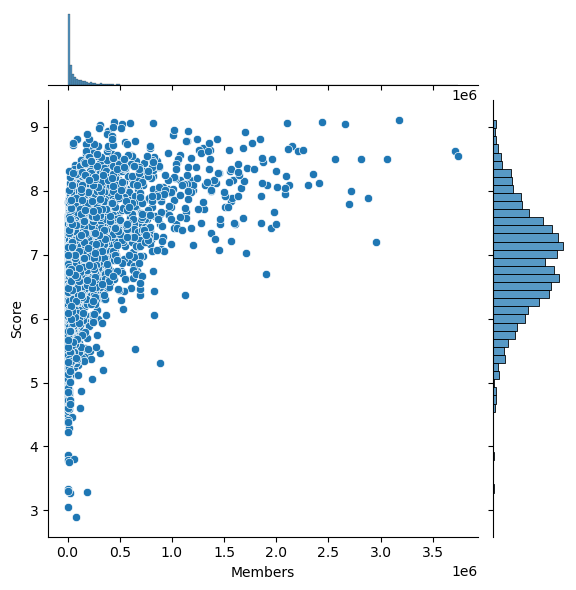

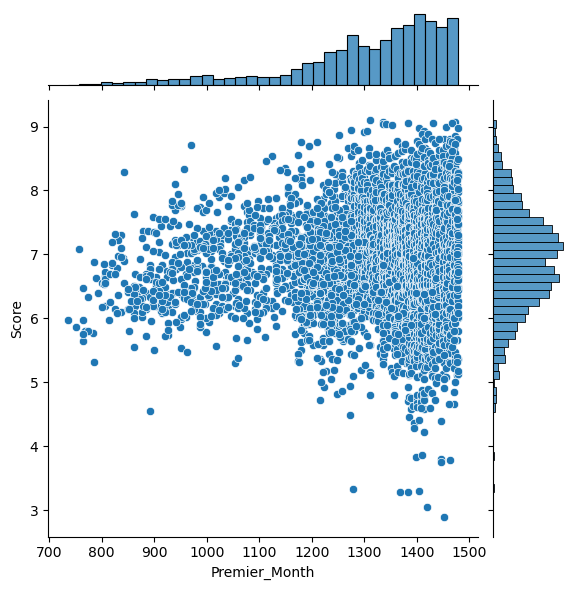

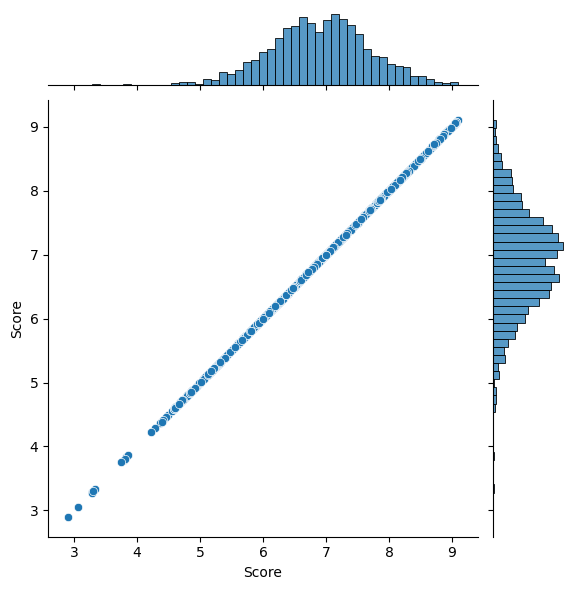

In [35]:
for y in numdf:
    sb.jointplot(x=numdf[y],y=numdf['Score'])

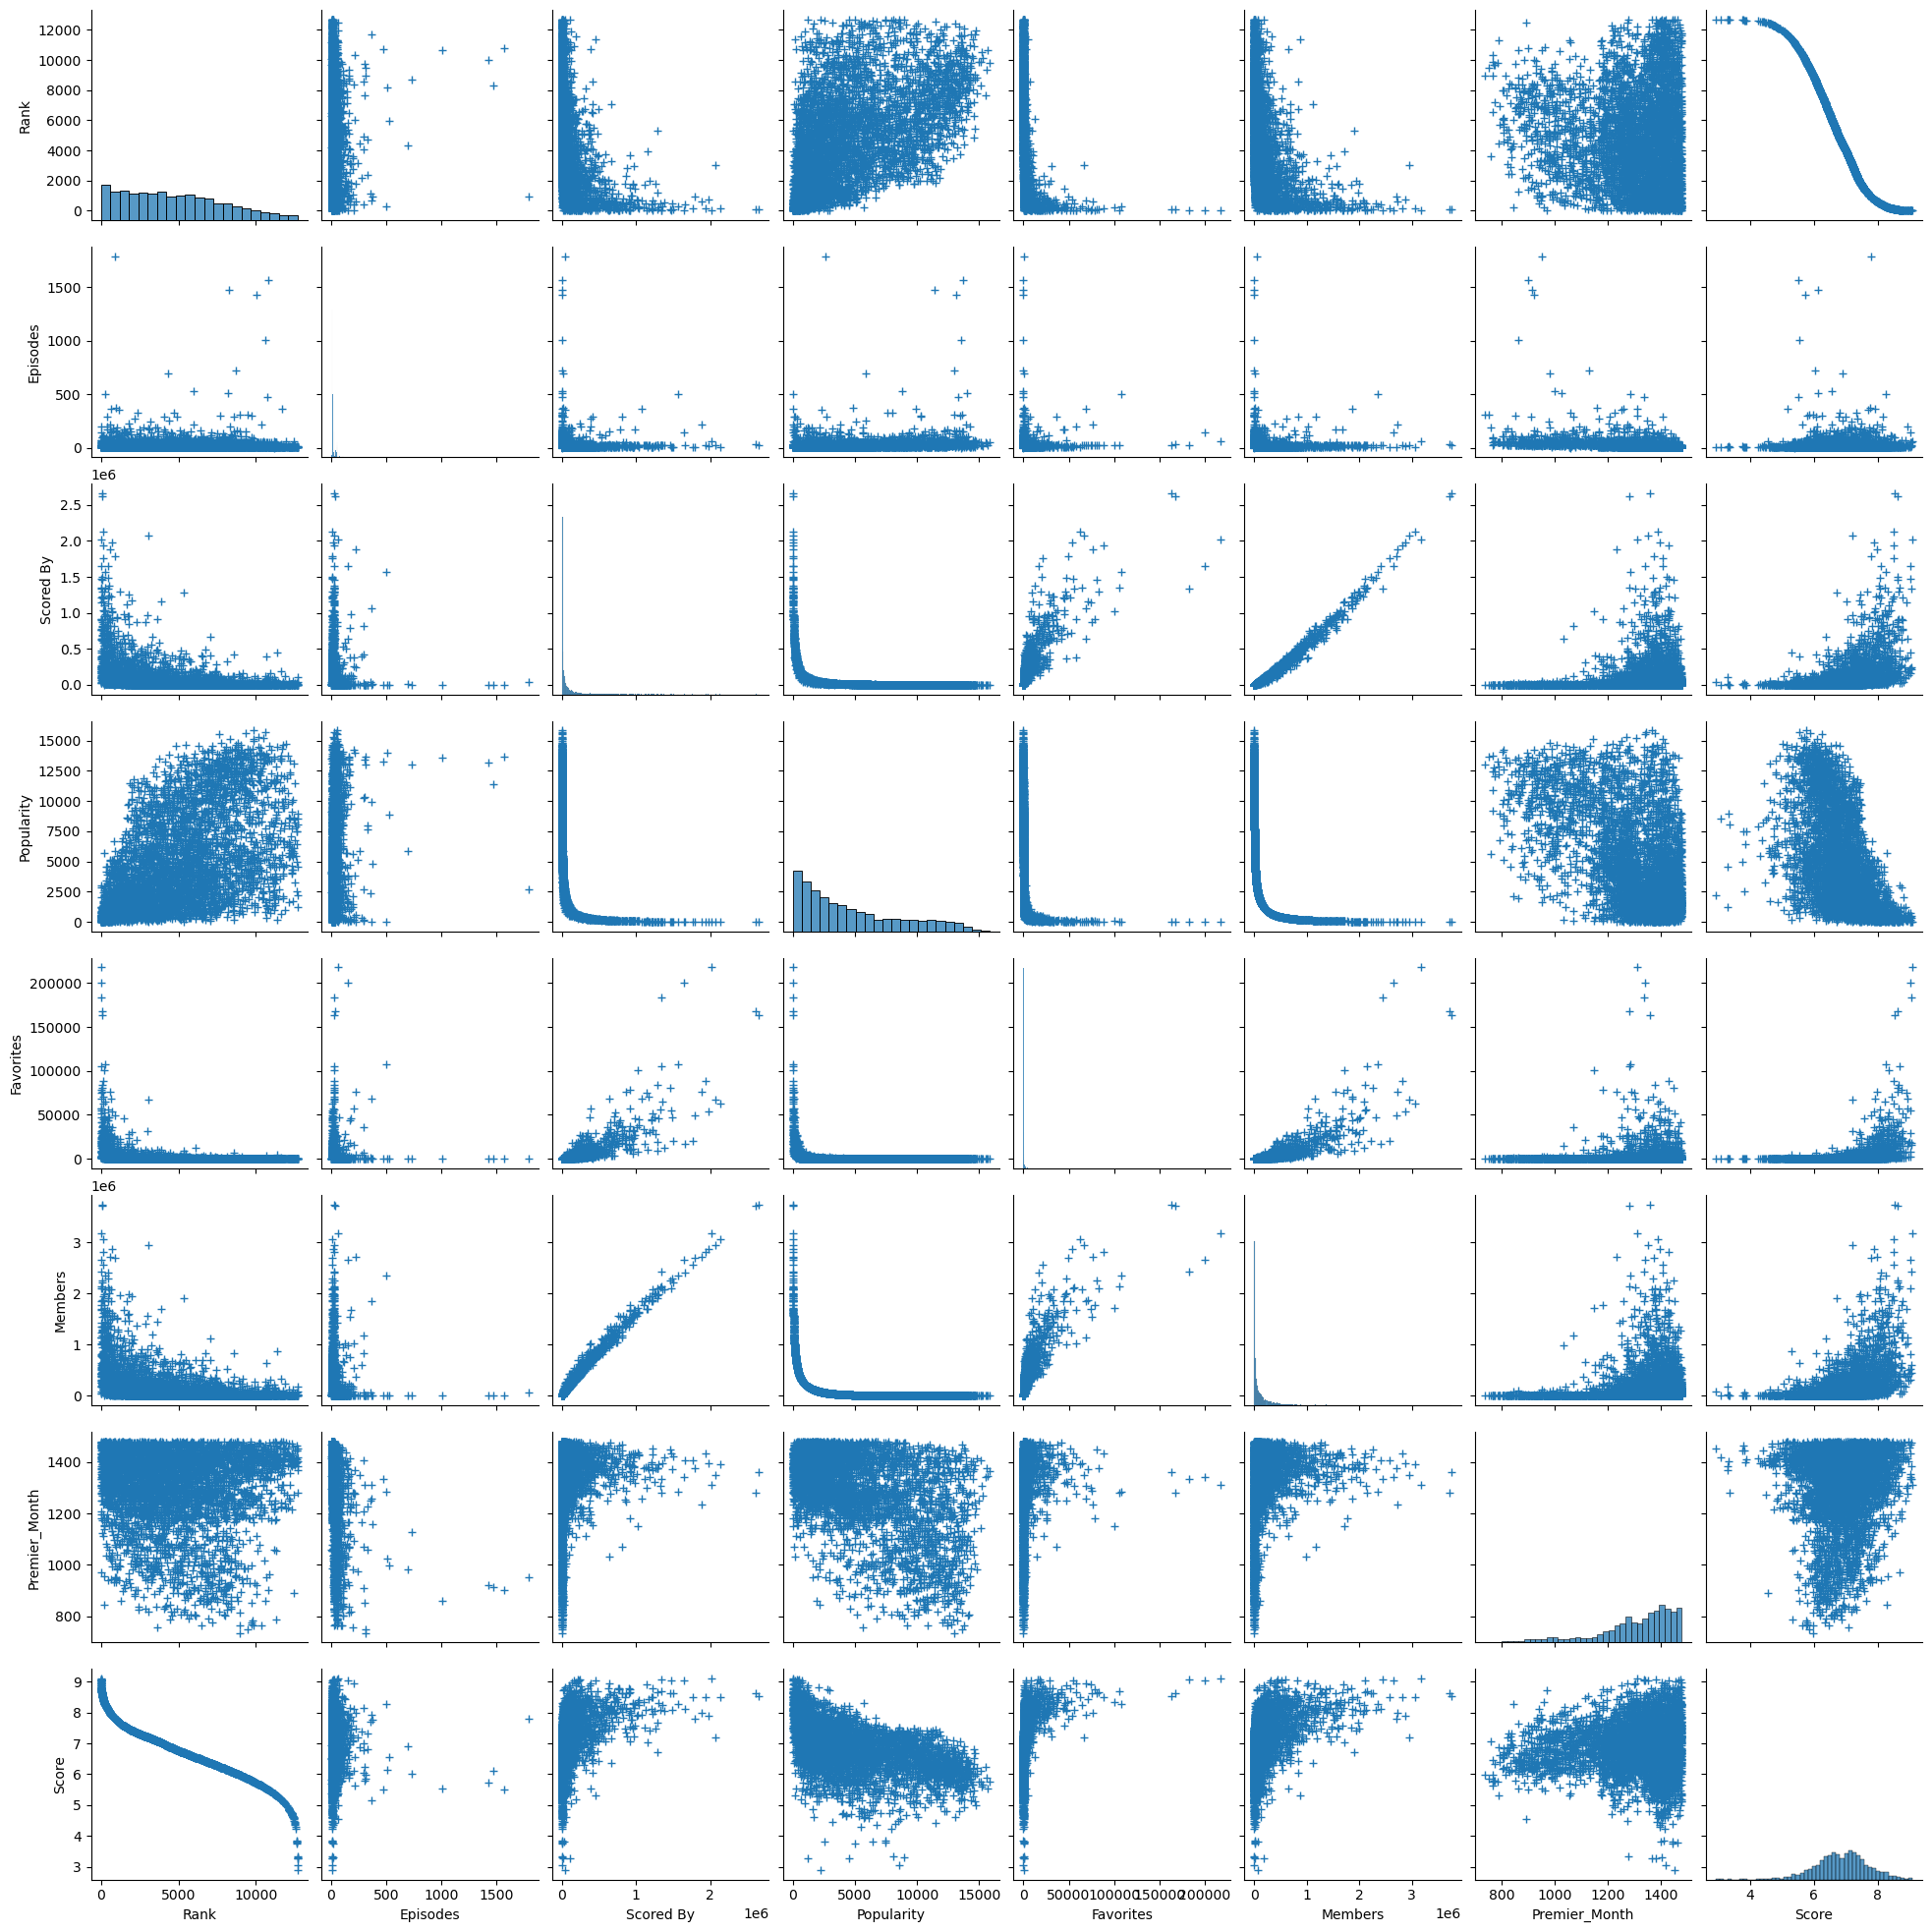

In [37]:
sb.pairplot(data = numdf, plot_kws=dict(marker="+", linewidth=1))

can we predict the score of the series using variables: 'Episodes', 'Popularity', 'Favourites', 'AiredYear', 'Duration_mins' 
which variable is the best in predicting score based on correlation

                   Rank  Episodes  Scored By  Popularity  Favorites   Members  \
Rank           1.000000  0.009722  -0.363999    0.553830  -0.270705 -0.405229   
Episodes       0.009722  1.000000  -0.013035    0.181341   0.042069 -0.025364   
Scored By     -0.363999 -0.013035   1.000000   -0.421085   0.795524  0.989240   
Popularity     0.553830  0.181341  -0.421085    1.000000  -0.242852 -0.482115   
Favorites     -0.270705  0.042069   0.795524   -0.242852   1.000000  0.787428   
Members       -0.405229 -0.025364   0.989240   -0.482115   0.787428  1.000000   
Premier_Month -0.047466 -0.279753   0.183703   -0.523527   0.076637  0.217894   
Score         -0.977496 -0.004872   0.413610   -0.540284   0.345935  0.455565   

               Premier_Month     Score  
Rank               -0.047466 -0.977496  
Episodes           -0.279753 -0.004872  
Scored By           0.183703  0.413610  
Popularity         -0.523527 -0.540284  
Favorites           0.076637  0.345935  
Members             0.21

<Axes: >

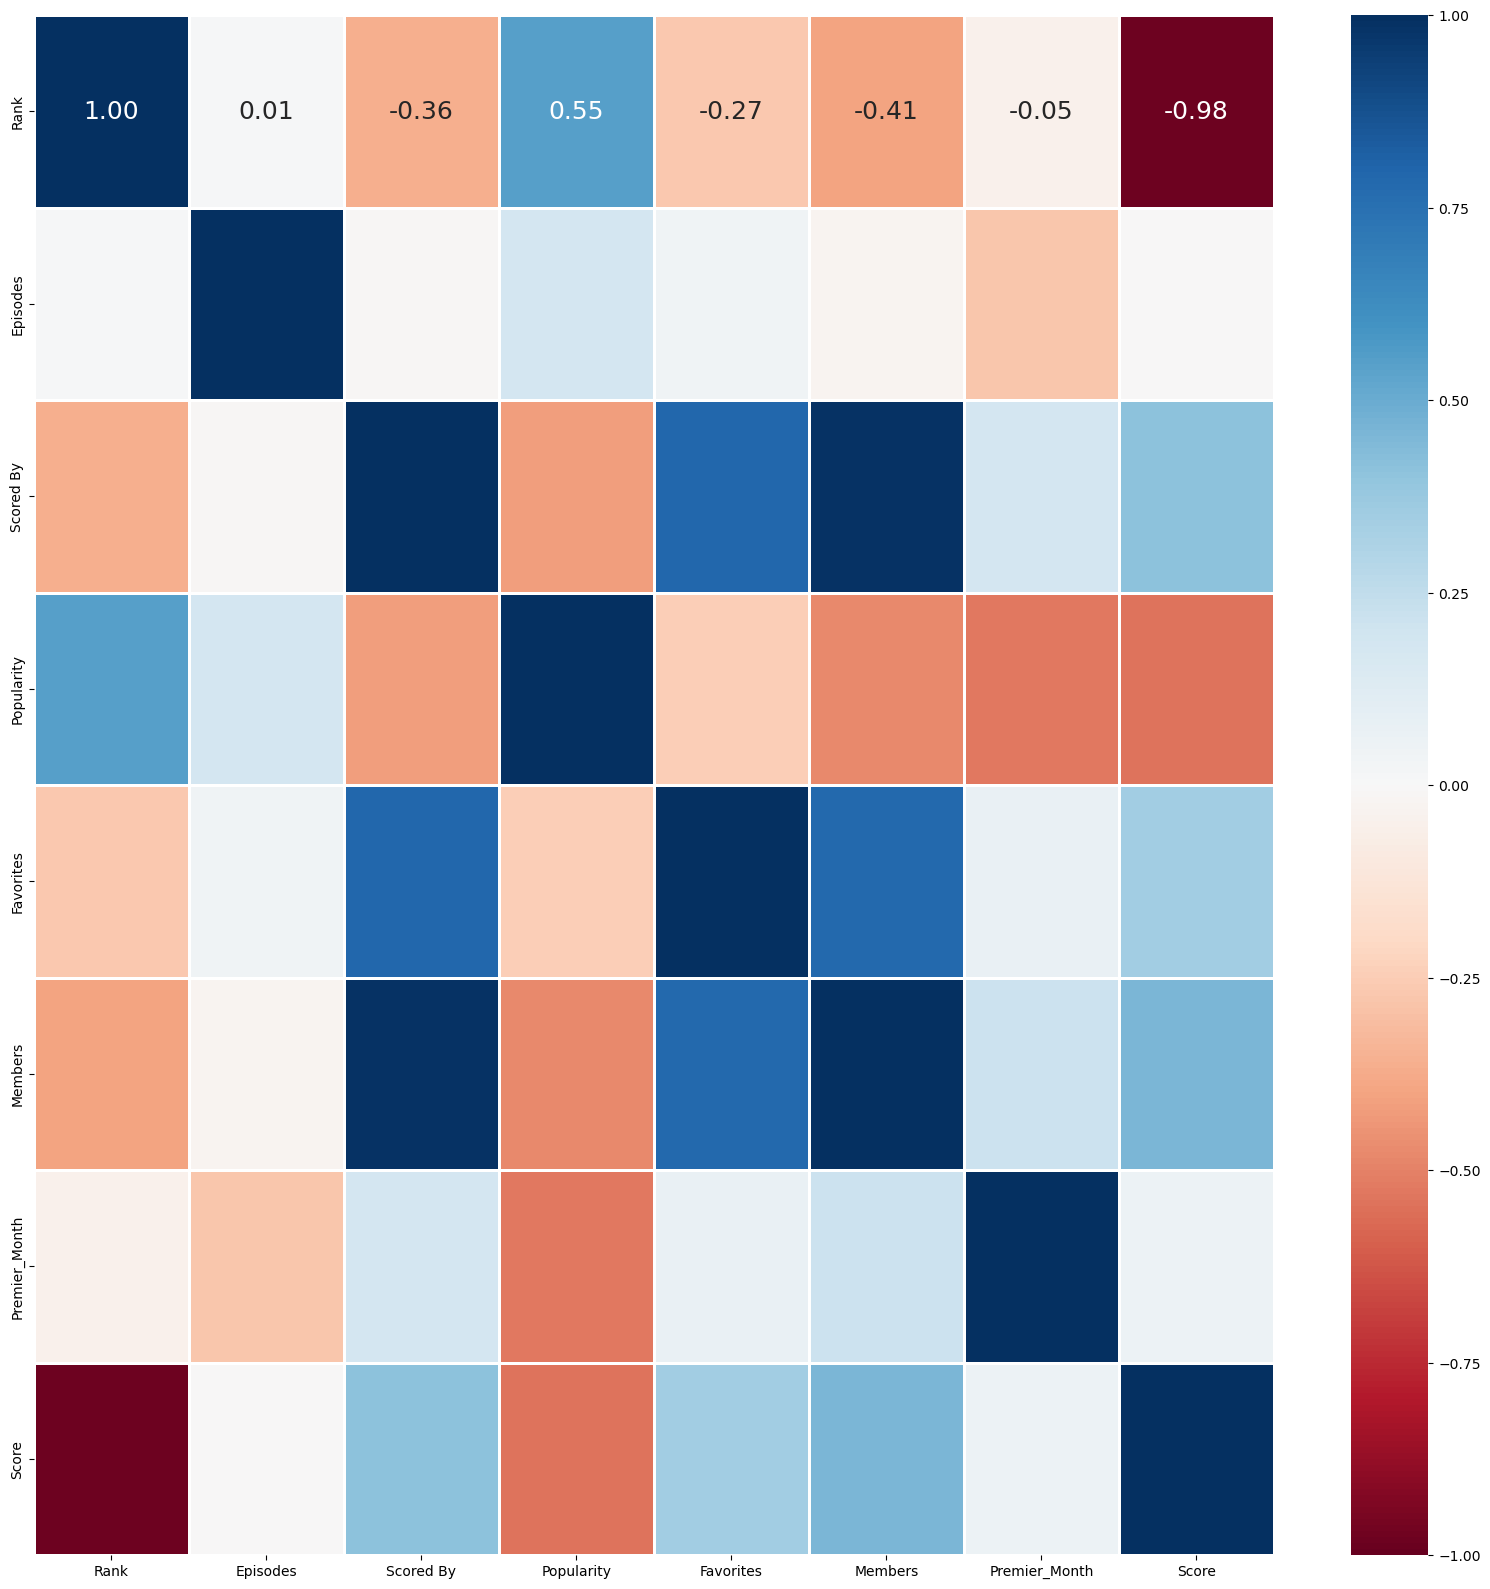

In [38]:
# Correlation Matrix
print(numdf.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(numdf.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

Based on correlation matrix, best numeric variables to preodict Score based on coeffeceint correlation are:\
    1.Rank\
    2.Popularity\
    3.Members\
    4.Scored by\
    5.Duration_mins\
    6.Favourites

Popularity, 